In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import os
import glob

In [29]:
path = '../dataset'
list_of_files = glob.glob(path + '/*.csv')
data = []
for filename in list_of_files:
    data.append(pd.read_csv(filename))
df = pd.concat(data, axis=0, ignore_index=True)

In [30]:
df.head()

,id,user_id,status,type,expiry,created_at,updated_at,reference_number,transaction_number,payment_at,account_id,total,title,self_href,product,fraud_status,blocked_at
0,161851566,10000313,SUCCESS,MITRA,2024-05-13 20:43:50.867 UTC,2024-05-13 20:39:13.166 UTC,2024-05-13 20:39:13.64 UTC,INV/TUC/MIT/240513/3811589A0OF,INV/PAY/MIT/240513/UGVYRJ352RV,2024-05-13 20:39:13.166 UTC,6752505.0,613500,MITRA,/mitra-service/me/transactions/23581631,mitra,False,2021-12-29 03:00:22 UTC
1,159629699,10000336,SUCCESS,MITRA,2024-05-03 10:33:34.86 UTC,2024-05-03 10:29:19.6 UTC,2024-05-03 10:29:19.972 UTC,INV/TUC/MIT/240503/28305262R63,INV/PAY/MIT/240503/6OGE25ZAJBW,2024-05-03 10:29:19.6 UTC,6752528.0,734000,MITRA,/mitra-service/me/transactions/23253457,mitra,False,2021-12-29 03:00:22 UTC
2,144706161,3674620,SUCCESS,BILL,2024-03-08 10:45:04.277 UTC,2024-03-06 10:45:04.417 UTC,2024-03-06 10:45:04.571 UTC,INV/BIL/ANG/240306/002H2F424YY,INV/PAY/BIL/240306/1R4CR60KQBG,2024-03-06 10:45:04.416 UTC,3101855.0,990000,FIF,/biller-service/transactions/35168831,installment,False,2022-02-14 23:16:38.981 UTC
3,141401317,10000336,SUCCESS,MITRA,2024-02-19 13:27:25.583 UTC,2024-02-19 13:22:33.449 UTC,2024-02-19 13:22:33.867 UTC,INV/TUC/MIT/240219/20409841O6D,INV/PAY/MIT/240219/29F5PP42DX7,2024-02-19 13:22:33.449 UTC,6752528.0,1470000,MITRA,/mitra-service/me/transactions/21110721,mitra,False,2021-12-29 03:00:22 UTC
4,167364097,10000336,SUCCESS,MITRA,2024-06-07 13:41:36.197 UTC,2024-06-07 13:37:58.293 UTC,2024-06-07 13:37:58.685 UTC,INV/TUC/MIT/240607/3630603NCYX,INV/PAY/MIT/240607/QGU1Q4J3LDB,2024-06-07 13:37:58.293 UTC,6752528.0,543000,MITRA,/mitra-service/me/transactions/24317242,mitra,False,2021-12-29 03:00:22 UTC


In [31]:
df.dtypes

id                      int64
user_id                 int64
status                 object
type                   object
expiry                 object
created_at             object
updated_at             object
reference_number       object
transaction_number     object
payment_at             object
account_id            float64
total                   int64
title                  object
self_href              object
product                object
fraud_status             bool
blocked_at             object
dtype: object

In [32]:
# Convert date columns to datetime
df['expiry'] = pd.to_datetime(df['expiry'], errors='coerce')
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['updated_at'] = pd.to_datetime(df['updated_at'], errors='coerce')
df['payment_at'] = pd.to_datetime(df['payment_at'], errors='coerce')
df['blocked_at'] = pd.to_datetime(df['blocked_at'], errors='coerce')

In [33]:
# Basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178572 entries, 0 to 178571
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  178572 non-null  int64              
 1   user_id             178572 non-null  int64              
 2   status              178572 non-null  object             
 3   type                178572 non-null  object             
 4   expiry              178350 non-null  datetime64[ns, UTC]
 5   created_at          178393 non-null  datetime64[ns, UTC]
 6   updated_at          178404 non-null  datetime64[ns, UTC]
 7   reference_number    178572 non-null  object             
 8   transaction_number  178572 non-null  object             
 9   payment_at          178397 non-null  datetime64[ns, UTC]
 10  account_id          178538 non-null  float64            
 11  total               178572 non-null  int64              
 12  title           

In [34]:
# Check for missing values
print(df.isnull().sum())


id                         0
user_id                    0
status                     0
type                       0
expiry                   222
created_at               179
updated_at               168
reference_number           0
transaction_number         0
payment_at               175
account_id                34
total                      0
title                      0
self_href                114
product                82599
fraud_status               0
blocked_at            165270
dtype: int64


In [35]:
# Check for duplicate records
duplicates = df[df.duplicated()]
print(f'Duplicate records: {len(duplicates)}')


Duplicate records: 0


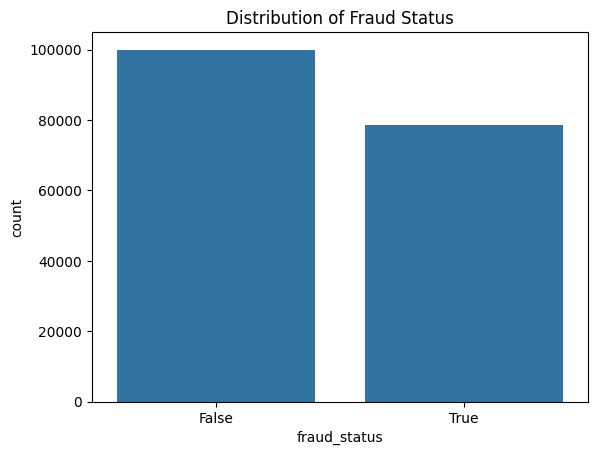

In [36]:
# Distribution of fraud status
sns.countplot(x='fraud_status', data=df)
plt.title('Distribution of Fraud Status')
plt.show()

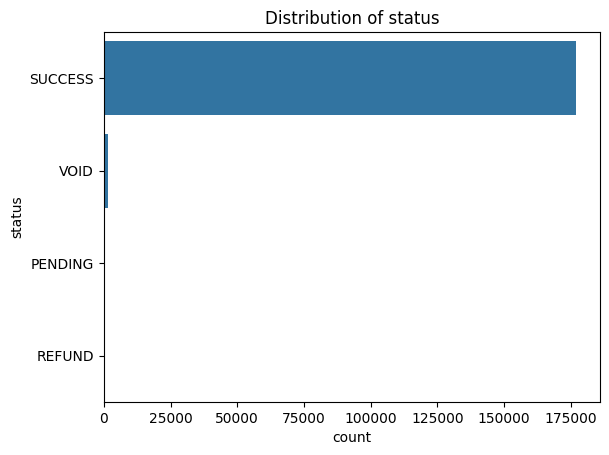

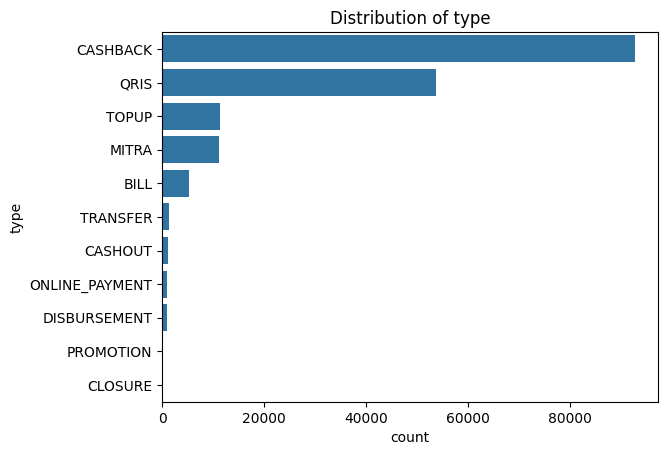

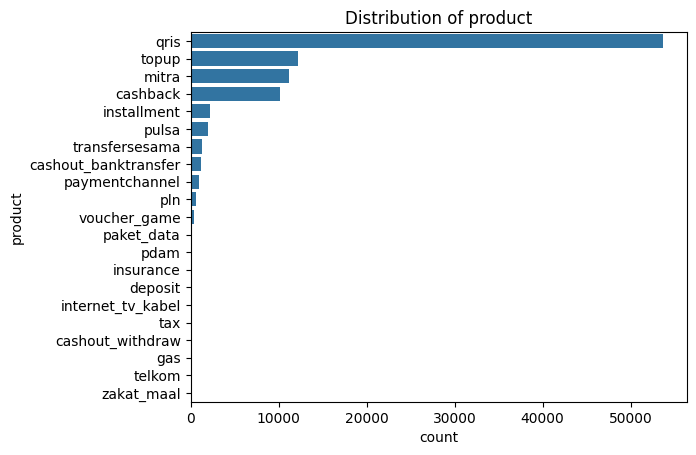

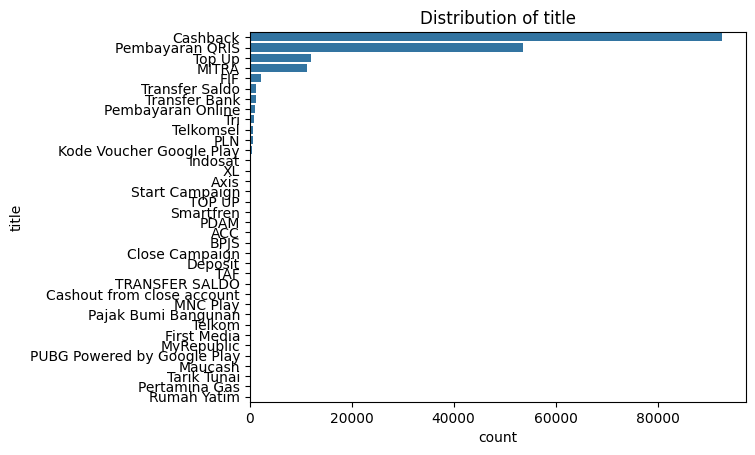

In [37]:
# Distribution of categorical variables
categorical_cols = ['status', 'type', 'product', 'title']
for col in categorical_cols:
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

In [38]:
# Convert categorical variables to numerical (for anomaly detection and classification)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [47]:
df = df.drop(['reference_number', 'transaction_number', 'self_href'], axis=1)

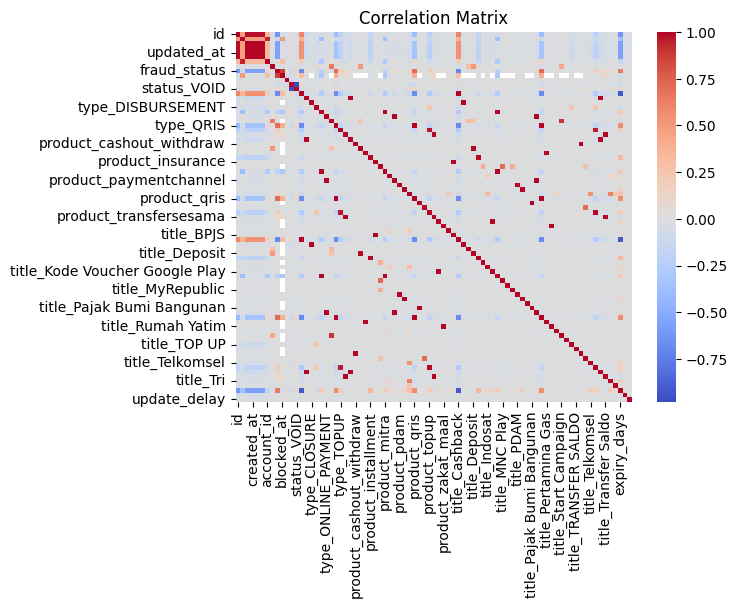

In [48]:
# Check correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=False, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [49]:
# Create time-based features
df['expiry_days'] = (df['expiry'] - df['created_at']).dt.days
df['payment_delay'] = (df['payment_at'] - df['created_at']).dt.days
df['update_delay'] = (df['updated_at'] - df['created_at']).dt.days


In [50]:
# Handle missing values for numerical columns
df['account_id'].fillna(df['account_id'].mean(), inplace=True)

/var/folders/b7/hg813cjd6151wzlnz64tbqbm0000gn/T/ipykernel_58349/499676075.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account_id'].fillna(df['account_id'].mean(), inplace=True)


In [51]:
# Feature engineering for anomaly detection
# Example: flagging transactions with high amounts as potential anomalies
df['high_amount_flag'] = df['total'].apply(lambda x: 1 if x > df['total'].quantile(0.95) else 0)